# Pytorch NN

En este caso, iniciaremos con un ejemplo muy sencillo para mostrar el enfoque de torch.nn.

Se puede entender una red neuronal como una forma de relacionar varios numeros. Por ejemplo, si tuviéramos que definir una función, las 'reglas' son conocidas:

```
float hw_function(float x){
    float y = (2 * x) - 1;
    return y;
}
```

La pregunta es, cómo logramos entrenar una red neuronal para realizar una tarea equivalente? Usando datos!. Si alimentamos una red con un conjunto de valores de X y Y, la misma debería ser capaz de "aprender" la relación entre tales valores.

## Módulos necesarios
Importamos pytorch y numpy para ayudarnos a representar nuestros datos de manera sencilla.

Usaremos torch.nn para representar nuestro modelo como una clase con una secuencia de capas.

In [1]:
import torch
from torch import nn

import numpy as np

## Definir la red neuronal

Vamos a crear la red neuronal más simple posible. Posee 1 capa, la capa tiene 1 neurona y los valores de entrada tienen dimensión 1.
En pytorch, esto se logra a través de una clase que herede de la clase nn.Module. Esta clase contiene diversas herramientas y utilidades exclusivas para el trabajo con redes neuronales.

In [2]:
# model = tf.keras.Sequential(
#     [
#         keras.layers.Dense(units=1, input_shape=[1])
#     ]
# )
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(in_features=1, out_features=1)
        )

    def forward(self, x):
        out = self.linear_stack(x)
        return out
    
model = BasicNN()
print(model)

BasicNN(
  (linear_stack): Sequential(
    (0): Linear(in_features=1, out_features=1, bias=True)
  )
)


En este ejemplo, nosotros sabemos que la relación entre los números es $y = 2x - 1$ 

Cuando la red está intentando "aprender" dicha relación, realiza predicciones como intentando adivinar. La **función de costo** compara las predicciones contra las respuestas correctas y mide qué tan buena o cercana fue la predicción al valor correcto.

Luego, se usa el **optimizador** para intentar disminuir el valor del costo. El optimizador intentará acercarse a la respuesta correcta en base al valor del costo.

Este proceso se repetirá por un número de **épocas** determinadas. En este ejemplo, se usará el error cuadrático medio o MSE para el costo y el descenso de gradiente estocástico o SGD para el optimizador.

## Obteniendo los datos

Seguidamente, obtendremos algo de datos. En este caso, 6 valores de X y 6 valores de Y. Se puede observar que la relación entre las variables está dada por $y = 2x - 1$, así que cuando $x = -1$, $y = -3$.

En este caso, usaremos arrays de numpy para definir estos arreglos de datos.

In [3]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0])
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])

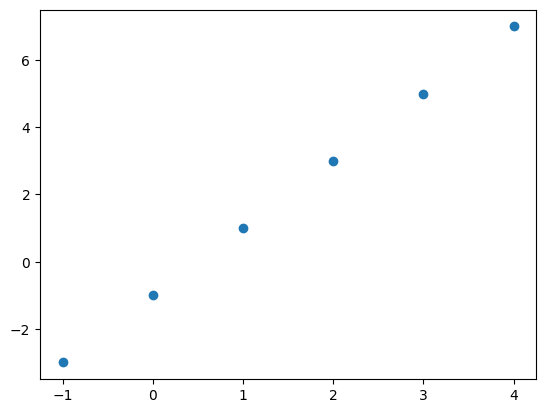

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(xs, ys)

# Entrenando la red neuronal

El proceso de entrenamiento es donde la red "aprende" la relación entre X y Y. En pytorch, una vez definido y el modelo se usa un bucle para realizar dicho entrenamiento.

En este entrenamiento se implementa el bucle mencionado anteriormente: predicción -> costo -> optimizador

Este bucle se repetirá por el número de épocas especificado.


In [9]:
# hyperparams
learning_rate = 1e-3
epochs = 100


In [10]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
def train_loop(X, y,model, loss_fn, optimizer):
    # train mode
    model.train()
    for x_sample, y_sample in zip(X, y):
        # forward
        x_sample = x_sample.unsqueeze(0)
        y_sample = torch.tensor(y_sample, dtype=torch.float32).unsqueeze(0)
        pred = model(x_sample)
        loss = loss_fn(pred, y_sample)
        # backward
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        


In [12]:
xs = torch.tensor(xs, dtype=torch.float32)
yx = torch.tensor(ys, dtype=torch.float32)
for i in range(epochs):
    print(f"epoch: {i + 1}")
    train_loop(xs, ys, model, loss_fn, optimizer)
print("done")

epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
epoch: 50
epoch: 51
epoch: 52
epoch: 53
epoch: 54
epoch: 55
epoch: 56
epoch: 57
epoch: 58
epoch: 59
epoch: 60
epoch: 61
epoch: 62
epoch: 63
epoch: 64
epoch: 65
epoch: 66
epoch: 67
epoch: 68
epoch: 69
epoch: 70
epoch: 71
epoch: 72
epoch: 73
epoch: 74
epoch: 75
epoch: 76
epoch: 77
epoch: 78
epoch: 79
epoch: 80
epoch: 81
epoch: 82
epoch: 83
epoch: 84
epoch: 85
epoch: 86
epoch: 87
epoch: 88
epoch: 89
epoch: 90
epoch: 91
epoch: 92
epoch: 93
epoch: 94
epoch: 95
epoch: 96
epoch: 97
epoch: 98
epoch: 99
epoch: 100
done


/var/folders/_1/cy_ykqys6wl_gc741r9fs8mr0000gn/T/ipykernel_93970/1939707944.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xs = torch.tensor(xs, dtype=torch.float32)


Perfecto! ya tenemos un modelo entrenado para aprender la relación entre X y Y. Ahora podemos usar **model.predict** para realizar predicciones en valores nunca vistos de X. por ejemplo, 10:

In [14]:
print(model(torch.tensor([5], dtype=torch.float32)))

tensor([8.4955], grad_fn=<ViewBackward0>)
